# In this workshop you will learn:
- Basics of R (objects, variables, data classes, vectors)
- How to write R functions
- How to import and export your own files
- How to install and load R and Bioconductor packages

# What is R?

- R is a language and environment for statistical computing and graphics (https://www.r-project.org/about.html). 
- It can be tailored to your needs by installing and using specific packages.
- You can use R interactively (e.g., enter commands into the R console or R Studio), write and run R scripts, or generate reports and documents using R notebooks and markdown files. 

# Objects and variables

Everything in R is an **object**. Each object is of a particular type, and objects can be assigned to variables.

R objects are assigned to variables using the assignment operator, **'<-'**
For example:

In [120]:
a <- 1

There are other assignment operators in R (like the `=` sign) but I would suggest you stick with the `<-` operator for now.

We can look at the output of our assignment using the `print()` function or by just typing `a`.

In [121]:
print(a)

[1] 1


In [122]:
a

[1] 1

We can name our variables anything as long as they are a combination of letters, numbers, dots, and underscores, however:

1. Variables can't start with a number.
2. Variables can't start with a dot if it followed directly by a number (directly following letters are OK).
3. Variables can't start with an underscore.

For example:

In [123]:
b.b <- 1.1
.cat <- 'cat' 
dog_ <- TRUE
egg <- (1L)
foo <- 2i

# Data classes

Data classes impact how functions will interact with your R object. R has 5 basic data classes, including:

1. `character`, which is a string
2. `numeric`, which can be `real` (a rounded number) or `decimal` (a number including a decimal point).
3. `integer`, which can be a rounded number (but not a decimal) 
4. `logical`, which can be either `TRUE` or `FALSE`
5. `complex`, allows you to use imaginary numbers 

Let's look at the data classes of our variables we have just assigned:

In [124]:
class(a)
class(b.b)
class(.cat)
class(dog_)
class(egg)
class(foo)

[1] "numeric"

[1] "numeric"

[1] "character"

[1] "logical"

[1] "integer"

[1] "complex"

The `L` we included when we assigned `egg` tells R that this object should be stored as an integer.

If you want to learn more about the `class()` function (or any other function), you can use the `?` symbol and the name of the function (for example, `?class`).

In [125]:
#?class

# R data structures
- R objects can also contain more than one element.
- Objects that contain more than one element are organized into different data structures.
- Data structures in R include vectors ('atomic vectors'), lists, matrices, arrays, and data frames.

### Vectors
- Probably the simplest R object that contains more than one element is a **vector**. 
- You can create a vector using the concatenate function, `c()`, or directly assigning them. 
- The `c()` function will coerce all of the arguments to a common data type and combine them to form a vector. 
- Here's a few examples of how you can assign vectors:

In [126]:
numeric_vector <- c(1,2,3,4,5) 
character_vector <- c('one', 'two', 'three', 'four', 'five') 
integer_vector <- (6:12) 
logical_vector <- c(TRUE, TRUE, FALSE)
character_vector_2 <- c('a', 'pug', 'is', 'not', 'a', 'big', 'dog')

Note that I used `:` when assigning `integer_vector`, which just generates a list from 6 through 12.

In [127]:
print(numeric_vector)
print(character_vector)
print(integer_vector)
print(logical_vector) 
print(character_vector_2)

[1] 1 2 3 4 5
[1] "one"   "two"   "three" "four"  "five" 
[1]  6  7  8  9 10 11 12
[1]  TRUE  TRUE FALSE
[1] "a"   "pug" "is"  "not" "a"   "big" "dog"


Vectors also have class:

In [128]:
print(class(numeric_vector))
print(class(character_vector))
print(class(integer_vector))
print(class(logical_vector)) 
print(class(character_vector_2))

[1] "numeric"
[1] "character"
[1] "integer"
[1] "logical"
[1] "character"


You can combine vectors using `c()`

In [129]:
combined_vector <- c(numeric_vector, integer_vector)

In [130]:
print(combined_vector)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12


You can use the `length()` function to see how long your vectors are:

In [131]:
print(length(combined_vector))

[1] 12


You can also access elements of the vector based on the index (or its position in the vector):

In [132]:
print(combined_vector[2])

[1] 2


You can combine these operations, but note that R code evaluates from the inside out:

In [133]:
print(combined_vector[length(combined_vector)])

[1] 12


Here, R is reading `length(combined_vector)` first. The value returned by the `length()` function is then used to access the last entry in the `combined_vector` vector.

You can also name vector elements and then access them by their names:

In [134]:
names(numeric_vector) <- c('one', 'two', 'three', 'four', 'five')
print(numeric_vector)

  one   two three  four  five 
    1     2     3     4     5 


In [135]:
print(numeric_vector['three'])

three 
    3 


We can use `-c` to remove vector elements:

In [136]:
print(combined_vector[-c(4)])

 [1]  1  2  3  5  6  7  8  9 10 11 12


If a vector is numerical, we can also perform some math operations on the entire vector. Here, we can calculate the sum of a vector:

In [137]:
print(combined_vector)
print(sum(combined_vector))

 [1]  1  2  3  4  5  6  7  8  9 10 11 12
[1] 78


In [138]:
print(combined_vector/sum(combined_vector))

 [1] 0.01282051 0.02564103 0.03846154 0.05128205 0.06410256 0.07692308
 [7] 0.08974359 0.10256410 0.11538462 0.12820513 0.14102564 0.15384615


Use the `round()` function to specify you only want 3 digits reported and assign it to a variable called `rounded`

In [139]:
rounded <- round((combined_vector/sum(combined_vector)), digits = 3)
print(rounded)

 [1] 0.013 0.026 0.038 0.051 0.064 0.077 0.090 0.103 0.115 0.128 0.141 0.154


You can also perform math operations on two vectors...

In [140]:
print(rounded + combined_vector)

 [1]  1.013  2.026  3.038  4.051  5.064  6.077  7.090  8.103  9.115 10.128
[11] 11.141 12.154


but you'll get weird results if the vectors are different lengths:

In [141]:
print(combined_vector)
print(numeric_vector)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12
  one   two three  four  five 
    1     2     3     4     5 


In [142]:
print(combined_vector + numeric_vector)

Warning message in combined_vector + numeric_vector:
“longer object length is not a multiple of shorter object length”

 [1]  2  4  6  8 10  7  9 11 13 15 12 14


It looks like R will give you an error message and then go back to the start of the shorter vector.

**Coercing between classes**

Let's say you're trying to import some data into R, maybe a vector of measurements:

In [143]:
your_data <- c('6','5','3','2','11','0','9','9')
class(your_data)

[1] "character"

You vector is a character vector because the elements of the vector are in quotes. You can coerce them back into numeric values using `as.numeric()`:

In [144]:
your_new_data <- as.numeric(your_data)
print(your_new_data)
class(your_new_data)

[1]  6  5  3  2 11  0  9  9


[1] "numeric"

What happens if we try to `as.numeric` things that aren't numbers?

In [145]:
as.numeric(character_vector_2)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] NA NA NA NA NA NA NA

The `<NA>` indicates that these are missing values, so be careful when converting between classes.

### Matrices
- A matrix in R is a collection of elements organized into rows and columns.
- All columns must be the same data type and be the same length.
- Generate a matrix using the following general format:

```
my_matrix <- matrix(
    vector, 
    nrow=r, 
    ncol=c, 
    byrow=FALSE)
```

For example:

In [146]:
my_matrix <- matrix(
    c(1:12), 
    nrow = 3, 
    ncol = 4, 
    byrow = FALSE)

print(my_matrix)

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12


In the above code, we made `my_matrix`, we specified it should be populated by the vector `c(1:12)`, with 3 rows (`nrow = 3`) and 4 columns (`ncol = 4`) and be populated by column, not by row (`byrow = FALSE`)

We can access the rows and columns by their numerical index using a `[row, column]` format.
For example, here's how we access row 3 and column 4:

In [147]:
my_matrix[3,4]

[1] 12

Access entire row 3:

In [148]:
print(my_matrix[3,])

[1]  3  6  9 12


Access entire column 4:

In [149]:
print(my_matrix[,4])

[1] 10 11 12


You can also name the rows and columns and then access them by name. 
For example, lets name the rows and columns of `my_matrix`

In [150]:
dimnames(my_matrix) <- list(
    c('row_1', 'row_2', 'row_3'), 
    c('column_1', 'column_2', 'column_3', 'column_4'))

You can also name the rows and columns separately using `rownames()` and `colnames()` 

In [151]:
rownames(my_matrix) <- c('row_1', 'row_2', 'row_3')
colnames(my_matrix) <- c('column_1', 'column_2', 'column_3', 'column_4')

In [152]:
print(my_matrix)

      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12


In [153]:
print(my_matrix['row_2',])

column_1 column_2 column_3 column_4 
       2        5        8       11 


In [154]:
print(my_matrix[,'column_2'])

row_1 row_2 row_3 
    4     5     6 


### Arrays
- An array can be similar to a matrix but they can have more than 2 dimensions (e.g., more than rows and columns)
- So, an array with 1 dimension is similar to a vector and an array with 2 dimensions is similar to a matrix.
- Generate an array with the following generic format:

```
my_array <- array(vector),dim = c(rows, columns, other_dims))
```

In [155]:
my_col_array <- array(
    c(1:12),
    dim = c(12,1,1))
print(my_col_array)

, , 1

      [,1]
 [1,]    1
 [2,]    2
 [3,]    3
 [4,]    4
 [5,]    5
 [6,]    6
 [7,]    7
 [8,]    8
 [9,]    9
[10,]   10
[11,]   11
[12,]   12



In [156]:
my_row_array <- array(
    c(1:12),
    dim = c(1,12,1))
print(my_row_array)

, , 1

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
[1,]    1    2    3    4    5    6    7    8    9    10    11    12



In [157]:
my_array <- array(
    c(1:12),
    dim = c(3,4,1))
print(my_array)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12



In [158]:
another_array <- array(
    c(1:24),
    dim = c(3,4,2))
print(another_array)

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

, , 2

     [,1] [,2] [,3] [,4]
[1,]   13   16   19   22
[2,]   14   17   20   23
[3,]   15   18   21   24



Access elements of arrays like this `[row, column, other_dims]`

In [159]:
print(another_array[3,2,1])

[1] 6


In [160]:
print(another_array[3,2,2])

[1] 18


You can also give your array some `dimnames()`:

In [161]:
dimnames(another_array) <- list(
    c('row_1', 'row_2', 'row_3'), 
    c('column_1', 'column_2', 'column_3', 'column_4'),
    c('matrix_1', 'matrix_2'))
print(another_array)

, , matrix_1

      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12

, , matrix_2

      column_1 column_2 column_3 column_4
row_1       13       16       19       22
row_2       14       17       20       23
row_3       15       18       21       24



Then access your array elements by name:

In [162]:
print(another_array['row_3', 'column_2', 'matrix_1'])

[1] 6


In [163]:
print(another_array['row_3',,'matrix_1'])

column_1 column_2 column_3 column_4 
       3        6        9       12 


### Data Frames

- A data frame is another way to organize a collection of rows and columns.
- It is similar to a matrix, except data frames allow different data types in different columns.
- We can use the `data.frame()` function to create a data frame from vectors using the following format:

```
dataframe <- data.frame(column_1, column_2, column_3)
```

In [164]:
example_df <- data.frame(
    c('a','b','c'), 
    c(1, 3, 5), 
    c(TRUE, TRUE, FALSE))

print(example_df)

  c..a....b....c.. c.1..3..5. c.TRUE..TRUE..FALSE.
1                a          1                 TRUE
2                b          3                 TRUE
3                c          5                FALSE


Use `names()` or `colnames()` to name columns,  `rownames()` to name rows, or `dimnames()` to assign both column and row names to the data frame:

In [165]:
colnames(example_df) <- c('letters', 'numbers', 'boolean')
rownames(example_df) <- c('first', 'second', 'third')
print(example_df)

       letters numbers boolean
first        a       1    TRUE
second       b       3    TRUE
third        c       5   FALSE


In [166]:
names(example_df) <- c('_letters_', '_numbers_', '_boolean_')
print(example_df)

       _letters_ _numbers_ _boolean_
first          a         1      TRUE
second         b         3      TRUE
third          c         5     FALSE


In [167]:
dimnames(example_df) <- list(c('__first', '__second', '__third'), c('__letters', '__numbers', '__boolean'))
print(example_df)

         __letters __numbers __boolean
__first          a         1      TRUE
__second         b         3      TRUE
__third          c         5     FALSE


We can use the `attributes()` function to get some information about our data frame:

In [168]:
attributes(example_df)

$names
[1] "__letters" "__numbers" "__boolean"

$class
[1] "data.frame"

$row.names
[1] "__first"  "__second" "__third"

#### Adding columns and rows

Let's make a new example dataframe to work with:

In [169]:
patients_1 <- data.frame(
    c('Boo','Rex','Chuckles'), 
    c(1, 3, 5), 
    c('dog', 'dog', 'dog'))
print(patients_1)

  c..Boo....Rex....Chuckles.. c.1..3..5. c..dog....dog....dog..
1                         Boo          1                    dog
2                         Rex          3                    dog
3                    Chuckles          5                    dog


In [170]:
names(patients_1) <- c('name', 'number_of_visits', 'type')
print(patients_1)

      name number_of_visits type
1      Boo                1  dog
2      Rex                3  dog
3 Chuckles                5  dog


We can use the column names to extract a single column using the notation `dataframe$column`, e.g.:

In [171]:
print(patients_1$name)

[1] Boo      Rex      Chuckles
Levels: Boo Chuckles Rex


The `cbind()` function can be used to add more columns to a dataframe:

In [172]:
column_4 <- c(4, 2, 6)
patients_1 <- cbind(patients_1, column_4)
print(patients_1)

      name number_of_visits type column_4
1      Boo                1  dog        4
2      Rex                3  dog        2
3 Chuckles                5  dog        6


We can also rename individual columns of the dataframe using index notation, lets rename the 4th column we just added:

In [173]:
colnames(patients_1)[4] <- 'age_in_years'
print(patients_1)

      name number_of_visits type age_in_years
1      Boo                1  dog            4
2      Rex                3  dog            2
3 Chuckles                5  dog            6


We can also use the `dataframe$column` notation to add a new column:

In [174]:
patients_1$weight_in_pounds <- c(35, 75, 15)
print(patients_1)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15


The `rbind()` function can be used to add more rows to a dataframe:

In [175]:
patients_1_rbind <- rbind(patients_1, c('Fluffy', 2, 'dog', 8, 105))
print(patients_1_rbind)

Warning message in `[<-.factor`(`*tmp*`, ri, value = "Fluffy"):
“invalid factor level, NA generated”

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15
4     <NA>                2  dog            8              105


Let's use `str()` and `attributes()` functions to look at the structure of this data frame:

In [176]:
str(patients_1)

'data.frame':	3 obs. of  5 variables:
 $ name            : Factor w/ 3 levels "Boo","Chuckles",..: 1 3 2
 $ number_of_visits: num  1 3 5
 $ type            : Factor w/ 1 level "dog": 1 1 1
 $ age_in_years    : num  4 2 6
 $ weight_in_pounds: num  35 75 15


In [177]:
attributes(patients_1$name)

$levels
[1] "Boo"      "Chuckles" "Rex"     

$class
[1] "factor"

- The `patients_1$name` column is classed as a `factor`, and the factors levels are `Boo`, `Chuckles`, and `Rex`. 
- Factor levels are just a collection of all potential entries for the vector. 
- R isn't sure what to do with the new level we are trying to add (`Fluffy`), so we have to turn those factors into strings.

# Factors
- In some situations, you might be dealing with categorical variable, which is known as a factor variable in R. 
- A factor is a type of variable that has a set number of distinct categories into which all observations fall, which are the levels.

*Factor variables are important because R's default behavior when reading in text files is to convert that text into a factor variable rather than a character variable, which can often lead to weird behavior if the user is trying to e.g. search that text.*


We can convert the `patients_1$name` column to a character as follows:

In [178]:
patients_1$name <- as.character(patients_1$name)
str(patients_1)

'data.frame':	3 obs. of  5 variables:
 $ name            : chr  "Boo" "Rex" "Chuckles"
 $ number_of_visits: num  1 3 5
 $ type            : Factor w/ 1 level "dog": 1 1 1
 $ age_in_years    : num  4 2 6
 $ weight_in_pounds: num  35 75 15


Then we can use `rbind()` to add a new row:

In [179]:
patients_1_rbind <- rbind(patients_1, c('Fluffy', 2, 'dog', 8, 105))
print(patients_1_rbind)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15
4   Fluffy                2  dog            8              105


# Re-ordering factor levels
- You might have ordinal data, like the following:

In [180]:
sizes <- factor(c('extra small', 'small', 'large', 'extra large', 'large', 'small', 'medium', 'medium', 'medium', 'medium', 'medium'))
table(sizes)

sizes
extra large extra small       large      medium       small 
          1           1           2           5           2 

We might not necessarily want the factor levels in alphabetical order. You can re-order them like so:

In [181]:
sizes_sorted <- factor(sizes, levels = c('extra small', 'small', 'medium', 'large', 'extra large'))
table(sizes_sorted)

sizes_sorted
extra small       small      medium       large extra large 
          1           2           5           2           1 

You can also use the `relevel()` function to specify that there's a single factor you'd like to use as the reference factor, which will now be the first factor:

In [182]:
sizes_releveled <- relevel(sizes, 'medium')
table(sizes_releveled)

sizes_releveled
     medium extra large extra small       large       small 
          5           1           1           2           2 

You can also coerce a factor to a character:

In [183]:
character_vector <- as.character(sizes)
class(character_vector)
print(character_vector)

[1] "character"

 [1] "extra small" "small"       "large"       "extra large" "large"      
 [6] "small"       "medium"      "medium"      "medium"      "medium"     
[11] "medium"     


Notice that print doesn't return the `Levels` and each element of the vector is now in quotes.
It is also possible to convert a factor into a numeric vector if you want to:

In [184]:
print(sizes)
numeric_vector <- as.numeric(sizes)
print(numeric_vector)

 [1] extra small small       large       extra large large       small      
 [7] medium      medium      medium      medium      medium     
Levels: extra large extra small large medium small
 [1] 2 5 3 1 3 5 4 4 4 4 4


This assigns numerical values based on alphabetical order of `sizes`

In [185]:
print(sizes_sorted)
ordered_numeric_vector <- as.numeric(sizes_sorted)
print(ordered_numeric_vector)

 [1] extra small small       large       extra large large       small      
 [7] medium      medium      medium      medium      medium     
Levels: extra small small medium large extra large
 [1] 1 2 4 5 4 2 3 3 3 3 3


This assigns numerical values based on the levels you set when you created `sizes_sorted`

# Data frame merging

Data is often spread across more than one file, reading each file into R will result in more than one data frame. If the data frames have some common identifying column, we can ust that common ID to combine the data frames. 

For example:

In [186]:
print(patients_1)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2      Rex                3  dog            2               75
3 Chuckles                5  dog            6               15


Let's make another data frame:

In [187]:
patients_2 <- data.frame(
    c('Fluffy', 'Smokey', 'Kitty'), 
    c(1, 1, 2), 
    c('cat', 'dog', 'cat'),
    c(1, 3, 5))
colnames(patients_2) <- c('name', 'number_of_visits', 'type', 'age_in_years')
print(patients_2)

    name number_of_visits type age_in_years
1 Fluffy                1  cat            1
2 Smokey                1  dog            3
3  Kitty                2  cat            5


We can use the `merge()` function to combine them:

In [188]:
patients_df <- merge(patients_1, patients_2, all = TRUE)
print(patients_df)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2 Chuckles                5  dog            6               15
3   Fluffy                1  cat            1               NA
4    Kitty                2  cat            5               NA
5      Rex                3  dog            2               75
6   Smokey                1  dog            3               NA


- Using `all = TRUE` will fill in blank values if needed (for example, the weight of any of the animals in `patients_2`).
- You can also return only the first data frame specified using the `all.x = TRUE` argument, but this will return all the columns 

In [189]:
patients_df <- merge(patients_1, patients_2, all.x = TRUE)
print(patients_df)

      name number_of_visits type age_in_years weight_in_pounds
1      Boo                1  dog            4               35
2 Chuckles                5  dog            6               15
3      Rex                3  dog            2               75


- Similarly, return only the second data frame specified using the `all.y = TRUE` argument:

In [190]:
patients_df <- merge(patients_1, patients_2, all.y = TRUE)
print(patients_df)

    name number_of_visits type age_in_years weight_in_pounds
1 Fluffy                1  cat            1               NA
2  Kitty                2  cat            5               NA
3 Smokey                1  dog            3               NA


You can also specify which columns to join on:

In [191]:
patients_df <- merge(patients_1, patients_2, by = c('name', 'type', 'number_of_visits', 'age_in_years'), all = TRUE)
print(patients_df)

      name type number_of_visits age_in_years weight_in_pounds
1      Boo  dog                1            4               35
2 Chuckles  dog                5            6               15
3   Fluffy  cat                1            1               NA
4    Kitty  cat                2            5               NA
5      Rex  dog                3            2               75
6   Smokey  dog                1            3               NA


### Lists

- Lists in R are very flexible, they are collections of elements that can be different classes, structures, whatever. You can even have lists of lists.
- You make lists using the `list()` function (or by coersion using `as.list()`.

In [192]:
my_list <- list(patients_df, character_vector, my_array, my_matrix)
print(my_list)

[[1]]
      name type number_of_visits age_in_years weight_in_pounds
1      Boo  dog                1            4               35
2 Chuckles  dog                5            6               15
3   Fluffy  cat                1            1               NA
4    Kitty  cat                2            5               NA
5      Rex  dog                3            2               75
6   Smokey  dog                1            3               NA

[[2]]
 [1] "extra small" "small"       "large"       "extra large" "large"      
 [6] "small"       "medium"      "medium"      "medium"      "medium"     
[11] "medium"     

[[3]]
, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12


[[4]]
      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12



Use `[[]]` to access list elements:

In [193]:
print(my_list[[2]])

 [1] "extra small" "small"       "large"       "extra large" "large"      
 [6] "small"       "medium"      "medium"      "medium"      "medium"     
[11] "medium"     


Add more brackets to access sub-elements of a list:

In [194]:
print(my_list[[2]][1])

[1] "extra small"


In [195]:
print(my_list[[1]][1,])

  name type number_of_visits age_in_years weight_in_pounds
1  Boo  dog                1            4               35


Name the list elements:

In [196]:
names(my_list) <- c('patients_df', 'character_vector', 'my_array', 'my_matrix')
print(my_list)

$patients_df
      name type number_of_visits age_in_years weight_in_pounds
1      Boo  dog                1            4               35
2 Chuckles  dog                5            6               15
3   Fluffy  cat                1            1               NA
4    Kitty  cat                2            5               NA
5      Rex  dog                3            2               75
6   Smokey  dog                1            3               NA

$character_vector
 [1] "extra small" "small"       "large"       "extra large" "large"      
 [6] "small"       "medium"      "medium"      "medium"      "medium"     
[11] "medium"     

$my_array
, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12


$my_matrix
      column_1 column_2 column_3 column_4
row_1        1        4        7       10
row_2        2        5        8       11
row_3        3        6        9       12



Use `unlist()` if you want to convert a list to a vector:

In [197]:
list_1 <- list(1:5)
print(list_1)

[[1]]
[1] 1 2 3 4 5



In [198]:
str(list_1)

List of 1
 $ : int [1:5] 1 2 3 4 5


In [199]:
str(unlist(list_1))

 int [1:5] 1 2 3 4 5


# Missing values
Missing values can result from things like inappropriate coersion, Excel turning everything into a date, encoding format problems, etc.

In [200]:
here_is_a_vector <- as.numeric(c(4/61, 35/52, '19-May', 3/40))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

We can use the `is.na()` function to see if our vector has any `<NA>` values in it:

In [201]:
is.na(here_is_a_vector)

[1] FALSE FALSE  TRUE FALSE

You can combine this with the `table()` function to see some tabulated results from `is.na()`:

In [202]:
table(is.na(here_is_a_vector))


FALSE  TRUE 
    3     1 

You might also encounter an `NaN`, which means 'not a number' and is the result of invalid math operations:

In [203]:
0/0

[1] NaN

`NULL` is another one you might encounter, and it is the result of trying to query a parameter that is undefined for a specific object. For example, you can use the `names()` function to retrieve names assigned to an object. What happens when you try to use this function on an object you haven't named?

In [204]:
names(here_is_a_vector)

NULL

You might also see `Inf` or `-Inf` which are positive or negative infinity, which result from dividing by zero or operations that do not converge:

In [205]:
1/0

[1] Inf

# Built-in functions
- We have already used a few functions in this workshop (like print). 
- Functions are a series of statements that work together to form a specific task.
- All functions need pieces of information (or arguments) to perform their particular function. 
- Sometimes arguments are required, sometimes arguments are optional. 
- You can use `?function` in R to learn more about a particular function (for example: `?print`).

For example, we have used the `print()` function earlier in this workshop, this function needs only one argument -- the thing you want to print.

In [206]:
print("Hello world.")

[1] "Hello world."


We can also give `print()` some optional arguments. For example, we can use the `quote = FALSE` argument with `print()`.

In [207]:
print("Hello world.", quote = FALSE)

[1] Hello world.


Let's talk about a few other functions. First, make a new vector using `c()`

In [208]:
new_vector <- c(70, 70, 90, 80, 60, 60, 90, 80, 70, 70, 70, 50)

We can look at the median:

In [209]:
print(median(new_vector))

[1] 70


We can look at the mean:

In [210]:
print(mean(new_vector))

[1] 71.66667


We can get some summary stats:

In [211]:
print(summary(new_vector))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.00   67.50   70.00   71.67   80.00   90.00 


We can also plot a quick histogram:

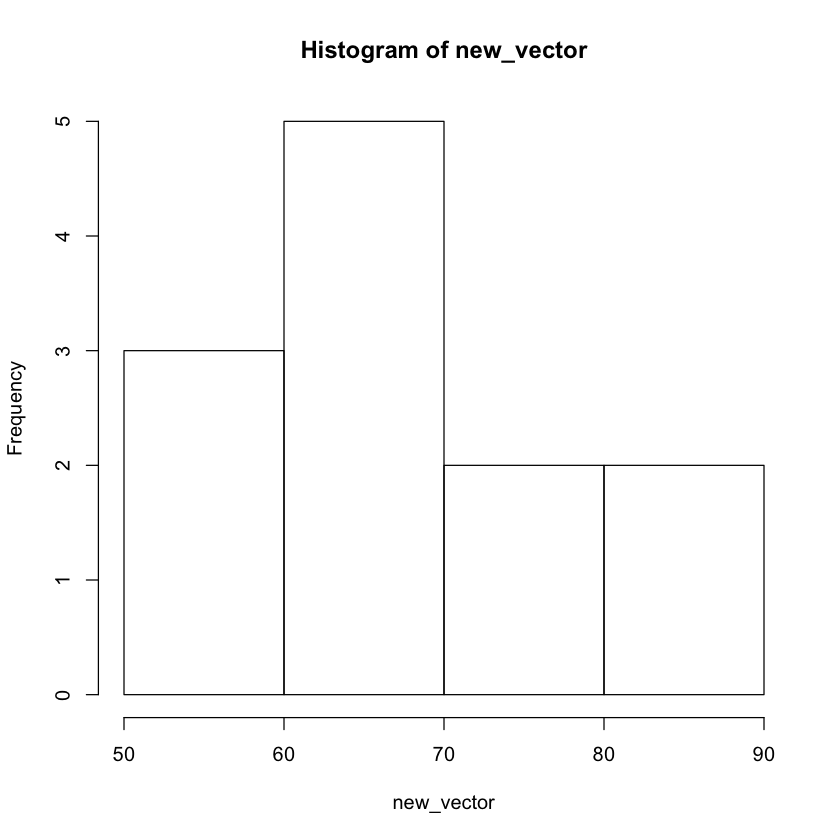

In [212]:
hist(new_vector)

We can use `%in%` to see if the  number 70 is in `new_vector`:

In [213]:
70 %in% new_vector

[1] TRUE

In [214]:
75 %in% new_vector

[1] FALSE

# User defined functions
- In addition to the already available functions in R, you can also create your own functions. 
- Generally, if you find yourself re-writing the same pieces of code over and over again, it might be time to write a function. 

Functions take the following basic format:

```
myfunction <- function(argument_name){
  stuff <- this is the body of the function(
    it contains statements that use argument_names
    to do things and make stuff)
  return(stuff)
}
```

More formally, R functions are broken up into 3 pieces:
1. formals() - the list of arguments
2. body() - code inside the function
3. environment() - how the function finds the values associated with function names

Here's an example of a function called `roll()` that rolls any number of 6-sided dice:

In [217]:
roll <- function(number_of_dice){
    rolled_dice <- sample(
        x = 6, 
        size = number_of_dice, 
        replace = TRUE)
    return(rolled_dice)
}

- The built-in R function `sample()` is nested inside our `roll()` function.
- `roll()` uses the argument `number_of_dice` as the `size`, `x` is the number of sides on the die, which we have hard-coded as `6`, and `replace = TRUE` means that we are sampling the space of all potential die roll outcomes with replacement.
- Lastly, we tell the function what it should return (`rolled_dice`).

To call that function and print the output:

In [218]:
print(roll(number_of_dice = 10))

 [1] 1 5 2 3 2 5 5 3 4 3


Lets look at the `formals()`

In [219]:
formals(roll)

$number_of_dice



What about `body()`?

In [220]:
body(roll)

{
    rolled_dice <- sample(x = 6, size = number_of_dice, replace = TRUE)
    return(rolled_dice)
}

What about `environment()`?

In [221]:
environment(roll)

<environment: R_GlobalEnv>

So, the function itself is called `roll`, it takes the argument or formals `number_of_dice` and the body of the function uses the built-in `sample` function in R to simulate dice rolls (use ?sample to learn more about the `sample()` function). 

## Anonymous functions

- You can also have something called an **anonymous function**, where you write the function but don't assign it to an object.
- The general format is:
```
(function(
     argument_name) 
     statements that use argument_name to create an object
  )(
    argument_name = argument)
```

In [222]:
(function(
    anonymous_dice) 
    sample(
        x = 6, 
        size = anonymous_dice, 
        replace = TRUE)
 )(
    anonymous_dice = 5)

[1] 1 2 1 1 2

## More on user defined functions
- We can also have functions that take more than one argument. 
- Lets say we want to roll different numbers of dice (`number_of_dice`) and we want to change the size of the dice we roll (`number_of_sides`).

In [223]:
roll <- function(
    number_of_dice, 
    number_of_sides){
    rolled_dice <- sample(
        x = number_of_sides, 
        size = number_of_dice, 
        replace = TRUE)
    return(rolled_dice)
}

- The new `roll()` uses the `sample()` function again, but this time it uses the `number_of_dice` and `number_of_sides`

In [224]:
print(roll(number_of_dice = 5, number_of_sides = 20))

[1] 18  5 19  4 17


- Lets say we want to roll different numbers of dice (`number_of_dice`) and we want to change the size of the dice we roll (`number_of_sides`) as well as tweak the number of times we roll the dice (`number_of_rolls`).
- We can use `replicate()` and `sample()`

In [225]:
roll <- function(
    number_of_rolls, 
    number_of_sides, 
    number_of_dice){
    rolled_dice <- replicate(
        number_of_rolls, 
        sample(
            x = number_of_sides, 
            size = number_of_dice, 
            replace = TRUE))
    return(rolled_dice)
}

- So, in the above function we use `number_of_dice`, `number_of_sides`, and `number_of_rolls` as arguments. 
- The `sample()` function takes the arguments `number_of_sides` and `number_of_dice`
- The `replicate()` function is takine `number_of_rolls` as an argument.

In [226]:
rolled_dice <- roll(number_of_rolls = 10, number_of_sides = 20, number_of_dice = 5)
print(rolled_dice)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]   17    2   18    9    2   12    6   19   18    19
[2,]   12    8    1   11    7    1   13   10    7     4
[3,]    9    5    3    9   12    8    6   10    1    20
[4,]   18    3   10   18   17    2   16    3    5     1
[5,]   19    1   16   17    1   14    3   14   12    19


You can use `colSums()` or `rowSums()` to calculate the sum of the columns and rows:

In [227]:
print(colSums(rolled_dice))

 [1] 75 19 48 64 39 37 44 56 43 63


In [228]:
print(rowSums(rolled_dice))

[1] 122  74  83  93 116


We can make `rolled_dice` into an **anonymous function**:

In [229]:
print(
    (function(
        number_of_dice, 
        number_of_sides, 
        number_of_rolls) 
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))
     )(
        number_of_dice = 5, 
        number_of_rolls = 10, 
        number_of_sides = 20))

      [,1] [,2] [,3] [,4] [,5]
 [1,]    4    1   18   19   16
 [2,]    3    9    9   20    6
 [3,]    9   12   19   18   10
 [4,]   15    7   10   18   16
 [5,]    1    1    3   12   16
 [6,]   10    9    3   12   20
 [7,]   13   13    9   18    2
 [8,]    7    1   17    2   19
 [9,]    2   13   12   18    8
[10,]   13    7    3   16    1


Lets make another anonymous function that makes a boxplot of our dice rolls:

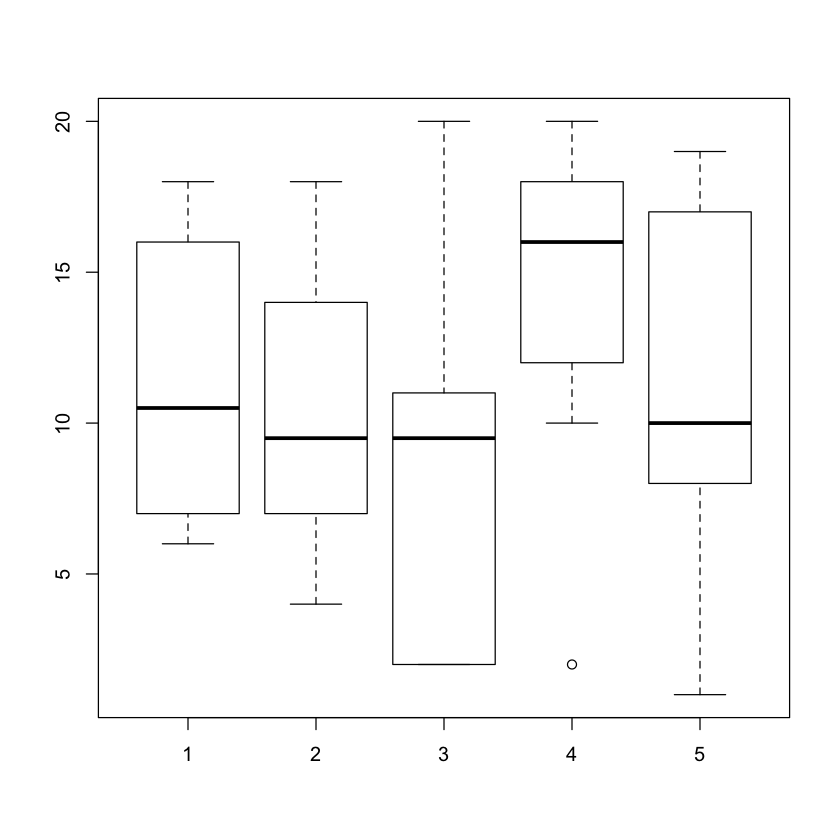

In [230]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))))
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

We can give the boxplot a title:

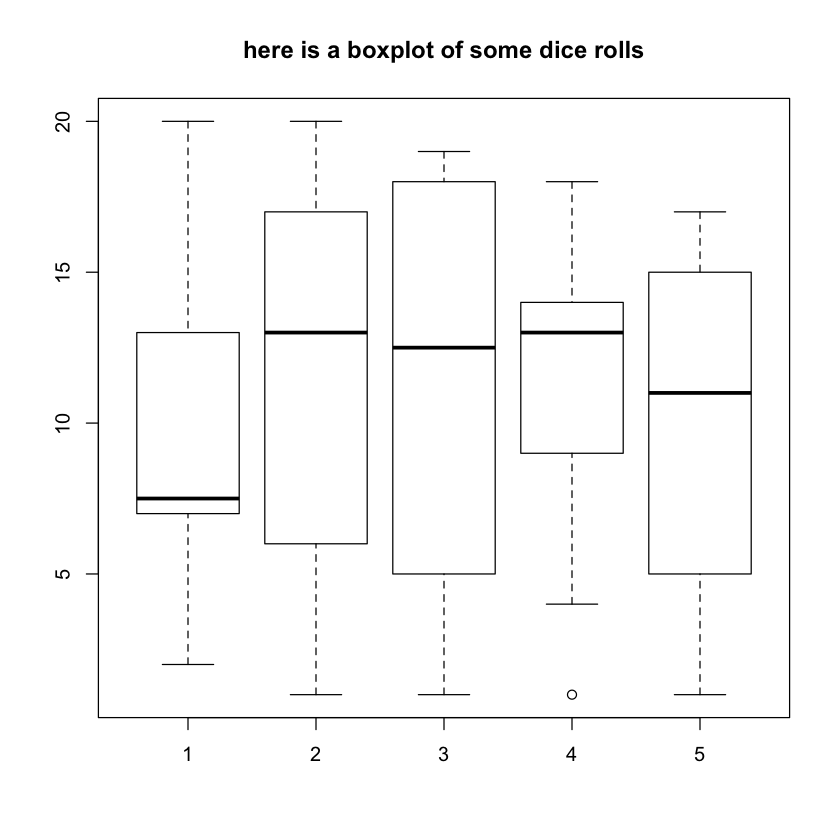

In [231]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))), 
            main = 'here is a boxplot of some dice rolls')
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

We can use `paste()` to pass the function arguments as parts of the title for the figure, by adding `main = paste('the ' , number_of_dice, ' ', number_of_sides, '-sided dice were rolled ', number_of_rolls, ' times', sep='')`

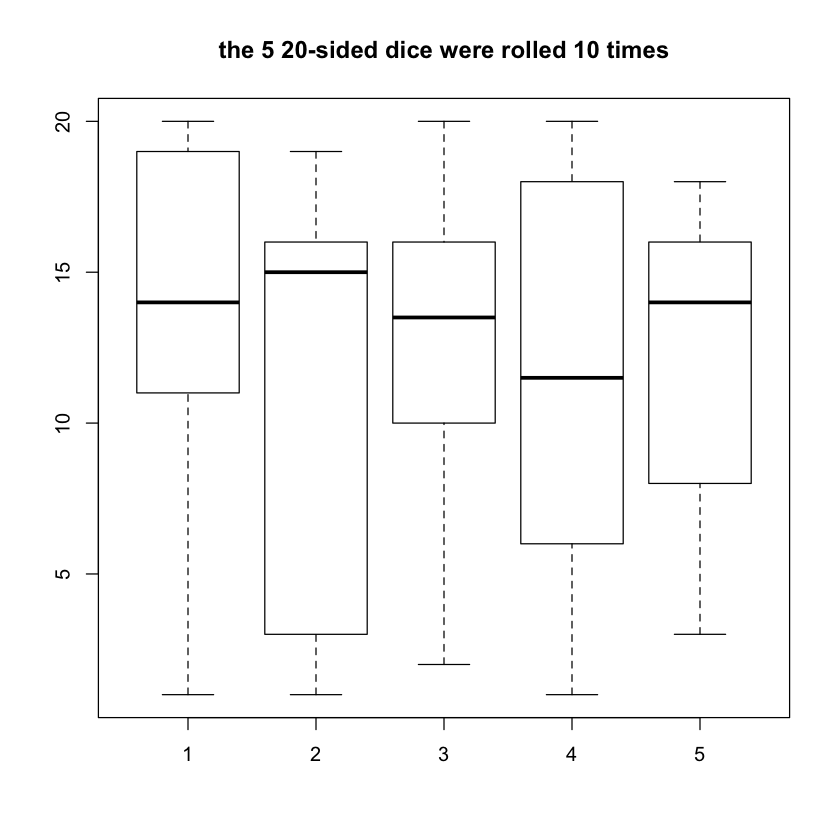

In [232]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))), 
            main = paste(
        'the ' , number_of_dice, ' ', number_of_sides, '-sided dice were rolled ', number_of_rolls, ' times', 
                sep=''))
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

We can add some colors to the figure by adding `col = c(1:number_of_dice)`, this will generate enough colors so that each bar has a different color:

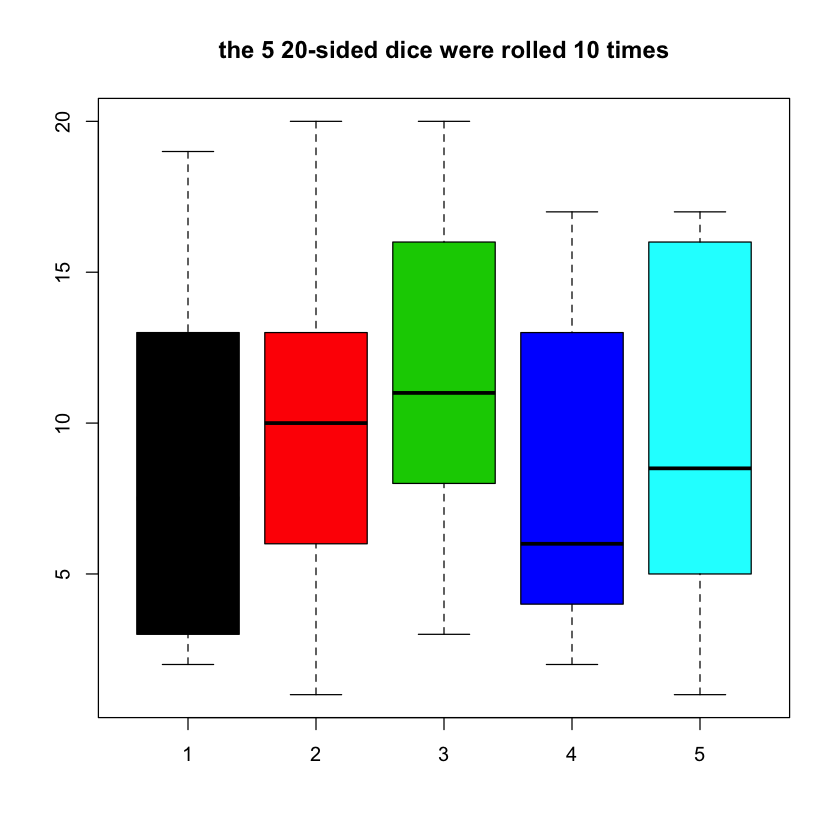

In [233]:
(function(number_of_dice, 
          number_of_sides, 
          number_of_rolls) 
    boxplot((
        replicate(
            number_of_dice, 
            sample(
                1:number_of_sides, 
                number_of_rolls, 
                replace = TRUE))), 
            main = paste(
        'the ' , number_of_dice, ' ', number_of_sides, '-sided dice were rolled ', number_of_rolls, ' times', 
                sep=''), 
           col = c(1:number_of_dice))
 )(
    number_of_dice = 5, 
    number_of_rolls = 10, 
    number_of_sides = 20)

## The `apply()` functions
- R uses a family of `apply()` functions to repetitively manipulate matrices, vectors, etc. while avoiding for loops. 
- How you use them will depend on the format of your data and what operations you're trying to perform.
- We will talk about `apply()`, `lapply()`, and `sapply()`.
- There is also `mapply()`, `vapply()`, `rapply()`, and `tapply()`, but we won't talk about those today.

- **`apply()`** Applies a function to rows and columns of a matrix or array
- **`lapply()`** Applies a function to each element of a list or vector and returns a list
- **`sapply()`** Applies a function to each element of a list or vector and returns a vector


### `apply()` 

The general format of an `apply()` call is as follows:

```
apply(X, MARGIN, FUN, ...)

```
- `X` is the array or matrix to apply the function
- `MARGIN` is where the function should be applied (`1` is for rows, `2` is for columns, c(1,2) is rows and columns, can also be a character vector of dimension names if X has dimnames.
- `FUN` is the function to apply
Let's go back to the dice rolling function:

In [234]:
rolled_dice <- roll(number_of_rolls = 10, number_of_sides = 20, number_of_dice = 5)
print(rolled_dice)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]    8    4   11   12   14   11    5   15   18    16
[2,]   20    8    5   11   13   19    5   19    3     9
[3,]    5    2    8    2    4    1   15    5   13     2
[4,]    8   14   15    2    1   10   17    7   11     6
[5,]   20   11   11    3    4    9   13   13    1     1


Let's try using `apply()` to calculate the column sums:

In [235]:
roll_column_sums <- apply(rolled_dice, 2, sum)
print(roll_column_sums)

 [1] 61 39 50 30 36 50 55 59 46 34


- We are using `apply()` with the built-in function `sum()`. 
- The `2` part of the argument tells `apply()` to apply the function to each column. 
- If we switch `2` to `1`, it will apply the function to each row.

In [236]:
roll_row_sums <- apply(rolled_dice, 1, sum)
print(roll_row_sums)

[1] 114 112  57  91  86


We can also add 1 to each element of the matrix using an anonymous function:

In [271]:
add_one <- apply(rolled_dice, c(1,2), function(element) element + 1)
print(add_one)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]    9    5   12   13   15   12    6   16   19    17
[2,]   21    9    6   12   14   20    6   20    4    10
[3,]    6    3    9    3    5    2   16    6   14     3
[4,]    9   15   16    3    2   11   18    8   12     7
[5,]   21   12   12    4    5   10   14   14    2     2


### `sapply` and `lapply()`

We can use `lapply()` and `sapply()` to add 1 to each element of the rolled_dice matrix:

In [238]:
print(lapply(rolled_dice, function(element) element + 1))

[[1]]
[1] 9

[[2]]
[1] 21

[[3]]
[1] 6

[[4]]
[1] 9

[[5]]
[1] 21

[[6]]
[1] 5

[[7]]
[1] 9

[[8]]
[1] 3

[[9]]
[1] 15

[[10]]
[1] 12

[[11]]
[1] 12

[[12]]
[1] 6

[[13]]
[1] 9

[[14]]
[1] 16

[[15]]
[1] 12

[[16]]
[1] 13

[[17]]
[1] 12

[[18]]
[1] 3

[[19]]
[1] 3

[[20]]
[1] 4

[[21]]
[1] 15

[[22]]
[1] 14

[[23]]
[1] 5

[[24]]
[1] 2

[[25]]
[1] 5

[[26]]
[1] 12

[[27]]
[1] 20

[[28]]
[1] 2

[[29]]
[1] 11

[[30]]
[1] 10

[[31]]
[1] 6

[[32]]
[1] 6

[[33]]
[1] 16

[[34]]
[1] 18

[[35]]
[1] 14

[[36]]
[1] 16

[[37]]
[1] 20

[[38]]
[1] 6

[[39]]
[1] 8

[[40]]
[1] 14

[[41]]
[1] 19

[[42]]
[1] 4

[[43]]
[1] 14

[[44]]
[1] 12

[[45]]
[1] 2

[[46]]
[1] 17

[[47]]
[1] 10

[[48]]
[1] 3

[[49]]
[1] 7

[[50]]
[1] 2



In [239]:
print(sapply(rolled_dice, function(element) element + 1))

 [1]  9 21  6  9 21  5  9  3 15 12 12  6  9 16 12 13 12  3  3  4 15 14  5  2  5
[26] 12 20  2 11 10  6  6 16 18 14 16 20  6  8 14 19  4 14 12  2 17 10  3  7  2


We can specify that the results should be a matrix:

In [240]:
rolled_dice_matrix <- matrix(
    (sapply(rolled_dice, function(element) element + 1)), 
    nrow = 5, 
    ncol = 10, 
    byrow = FALSE)
print(rolled_dice_matrix)     

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]    9    5   12   13   15   12    6   16   19    17
[2,]   21    9    6   12   14   20    6   20    4    10
[3,]    6    3    9    3    5    2   16    6   14     3
[4,]    9   15   16    3    2   11   18    8   12     7
[5,]   21   12   12    4    5   10   14   14    2     2


# Working with larger data

- All of the examples we have used so far are relatively small, here are some approaches you can use when working with larger data.
- R comes with some pre-loaded data sets -- you see the list by typing `print(data())`, but it is quite long.

Load the `DNase` data and turn it into a data frame:

In [241]:
data(DNase)
DNase <- data.frame(DNase)

Let's use the `dim()`, `nrow()`, and `ncol()` functions to get the number of rows (`nrow()`), number of columns (`nrow()`), and number of both rows and columns (`dim()`)

In [242]:
dim(DNase)

[1] 176   3

In [243]:
nrow(DNase)

[1] 176

In [244]:
ncol(DNase)

[1] 3

We can use the `head()` function to look at the first few lines of the data frame:

In [245]:
head(DNase)

Run,conc,density
<ord>,<dbl>,<dbl>
1,0.04882812,0.017
1,0.04882812,0.018
1,0.19531250,0.121
1,0.19531250,0.124
1,0.39062500,0.206
1,0.39062500,0.215


You can use the `n` argument to look at a different number of lines

In [246]:
head(DNase, n = 3)

Run,conc,density
<ord>,<dbl>,<dbl>
1,0.04882812,0.017
1,0.04882812,0.018
1,0.19531250,0.121


We can use the `tail()` function to look at the last few lines of the data frame:

In [247]:
tail(DNase, n = 5)

,Run,conc,density
,<ord>,<dbl>,<dbl>
172,11,3.125,0.980
173,11,6.250,1.421
174,11,6.250,1.385
175,11,12.500,1.715
176,11,12.500,1.721


The summary function, which can be applied to either a vector or a data frame (in the latter case, R applies it separately to each column in the data frame) yields a variety of summary statistics about each variable. 

In [248]:
summary(DNase)

      Run          conc             density      
 10     :16   Min.   : 0.04883   Min.   :0.0110  
 11     :16   1st Qu.: 0.34180   1st Qu.:0.1978  
 9      :16   Median : 1.17188   Median :0.5265  
 1      :16   Mean   : 3.10669   Mean   :0.7192  
 4      :16   3rd Qu.: 3.90625   3rd Qu.:1.1705  
 8      :16   Max.   :12.50000   Max.   :2.0030  
 (Other):80                                      

`summary()` is informative for numerical data, but not so helpful for factor data, as in the `Run` column. 
Let's make a smaller subset of the `DNase` data to work with:

In [249]:
DNase.subset <- DNase[1:20, ]
DNase.subset

Run,conc,density
<ord>,<dbl>,<dbl>
1,0.04882812,0.017
1,0.04882812,0.018
1,0.19531250,0.121
1,0.19531250,0.124
1,0.39062500,0.206
1,0.39062500,0.215
1,0.78125000,0.377
1,0.78125000,0.374
1,1.56250000,0.614


We can also sort our data. Let's look at the `conc` column:

In [250]:
print(DNase.subset$conc)

 [1]  0.04882812  0.04882812  0.19531250  0.19531250  0.39062500  0.39062500
 [7]  0.78125000  0.78125000  1.56250000  1.56250000  3.12500000  3.12500000
[13]  6.25000000  6.25000000 12.50000000 12.50000000  0.04882812  0.04882812
[19]  0.19531250  0.19531250


Use the `order()` function to figure out the ascending rankings of the values

In [251]:
order(DNase.subset$conc)

[1]  1  2 17 18  3  4 19 20  5  6  7  8  9 10 11 12 13 14 15 16

We can assign this ordering to a vector:

In [252]:
reorder.vector <- order(DNase.subset$conc)

And use it to reorder our data frame:

In [253]:
DNase.subset[reorder.vector, ]

,Run,conc,density
,<ord>,<dbl>,<dbl>
1,1,0.04882812,0.017
2,1,0.04882812,0.018
17,2,0.04882812,0.045
18,2,0.04882812,0.050
3,1,0.19531250,0.121
4,1,0.19531250,0.124
19,2,0.19531250,0.137
20,2,0.19531250,0.123
5,1,0.39062500,0.206


Data frames can be classified into two broad categories: wide format and long format. All data frames shown so far have been presented in wide format. A wide format data frame has each row describe a sample and each column describe a feature. Here is a short example of a data frame in wide format, tabulating counts for three genes in three patients:

In [254]:
wide.df <- data.frame(c("A", "B", "C"), c(1, 1, 2), c(5, 6, 7), c(0, 1, 0))
colnames(wide.df) <- c("id", "gene.1", "gene.2", "gene.3")
wide.df

id,gene.1,gene.2,gene.3
<fct>,<dbl>,<dbl>,<dbl>
A,1,5,0
B,1,6,1
C,2,7,0


Long format stacks features on top of one another; each row is the combination of a sample and a feature.  One column exists to denote the feature in question, and another column exists to denote that feature' value:

In [255]:
long.df <- data.frame(c("A", "A", "A", "B", "B", "B", "C", "C", "C"), c("gene.1", "gene.2", "gene.3", "gene.1", "gene.2", "gene.3", "gene.1", "gene.2", "gene.3"), c(1, 5, 0, 1, 6, 1, 2, 7, 0))
colnames(long.df) <- c("id", "gene", "count")
long.df

id,gene,count
<fct>,<fct>,<dbl>
A,gene.1,1
A,gene.2,5
A,gene.3,0
B,gene.1,1
B,gene.2,6
B,gene.3,1
C,gene.1,2
C,gene.2,7
C,gene.3,0


These formats both contain the exact same data but represent it in different ways. Various functions exist to convert between wide and long format but these are beyond the scope of today's discussion. You can look up the `reshape2` or `tidyr` packages if you're interested in learning more about converting between long and wide formats -- alternatively, check out our tidyverse workshop.

# Importing and Exporting files
- Use the `write.table` or `write.csv` functions to write outputs in R.
- Lets use some of the pre-loaded data that comes with R. 

In [256]:
iris <- data.frame(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


You can write the output to a file using `write.table` or `write.csv`:

In [257]:
write.table(iris, file = '~/iris_table.txt')
write.csv(iris, file = '~/iris_csv.csv')

Let's try using `read.table` and `read.csv` to test out importing data:

In [258]:
iris_table <- read.table('~/iris_table.txt')
iris_csv <- read.csv('~/iris_csv.csv')

In [259]:
head(iris_table)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [260]:
head(iris_csv)

X,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Notice that the `Species` column is a factor. If we'd like text strings to be characters instead of factors when we import we can use `stringsAsFactors = FALSE`:

In [261]:
iris_table <- read.table('~/iris_table.txt', stringsAsFactors = FALSE)
iris_csv <- read.csv('~/iris_csv.csv', stringsAsFactors = FALSE)

In [262]:
head(iris_table)
head(iris_csv)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


X,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


To convert back into a factor:

In [263]:
iris_table$Species <- as.factor(iris_table$Species)
iris_csv$Species <- as.factor(iris_csv$Species)

In [264]:
head(iris_table)
head(iris_csv)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


X,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Use `list.files()` get a list of all files in a directory:

In [265]:
list.files(path = '~', pattern = 'iris_*')

[1] "iris_csv.csv"   "iris_table.txt"

# R packages
- Although R comes with many built in functions, you will probably want to install and use various R packages.
- You can install the packages using `install.packages('package_name_here')` (where you would replace 'package_name_here' with your package of choice, in quotes). 
- This will download the package and any additional required dependencies. 
- Uncomment out the next line (e.g., remove the #) to install the the 'ggplot2' package:

In [266]:
install.packages('ggplot2')


The downloaded binary packages are in
	/var/folders/72/vj4x94hd7375wt06bb5fr36hwbf4ln/T//RtmpL2pqZI/downloaded_packages


Before you can actually use the package, you have to load it as follows:

In [267]:
library('ggplot2')

Most R packages are found in CRAN - the central repository for R package. However, packages can be found in different places. Many of the packages of interest for biologists will be in Bioconductor. 

There are two steps to downloading a package from Bioconductor -- first, install BiocManager (again, remove the # to actually run the install).

In [268]:
install.packages("BiocManager")


  There is a binary version available but the source version is later:
            binary source needs_compilation
BiocManager 1.30.7 1.30.9             FALSE



installing the source package ‘BiocManager’



Then, load `BiocManager` and use `BiocManager::install()` to install a package (remove the # to run the install command).

In [269]:
library('BiocManager')
BiocManager::install("org.Hs.eg.db")

Bioconductor version 3.8 (BiocManager 1.30.9), ?BiocManager::install for help
Bioconductor version 3.8 (BiocManager 1.30.9), R 3.5.2 (2018-12-20)
Installing package(s) 'org.Hs.eg.db'
installing the source package ‘org.Hs.eg.db’

Old packages: 'arrangements', 'backports', 'callr', 'clipr', 'curl',
  'data.table', 'devtools', 'digest', 'DT', 'ellipsis', 'fivethirtyeight',
  'foreign', 'ggforce', 'ggplotify', 'ggpubr', 'ggraph', 'ggsignif', 'hms',
  'htmlTable', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'KernSmooth',
  'knitr', 'lambda.r', 'later', 'markdown', 'matrixStats', 'mgcv', 'modelr',
  'nlme', 'openxlsx', 'pkgbuild', 'pkgconfig', 'promises', 'purrr', 'R.oo',
  'Rcpp', 'RcppArmadillo', 'rlang', 'rmarkdown', 'RSQLite', 'rvcheck',
  'seqinr', 'shiny', 'sys', 'testthat', 'tinytex', 'units', 'whisker', 'xfun',
  'xml2', 'zip'


Use the `sessionInfo()` function to see more information about your loaded R packages and namespace:

In [270]:
print(sessionInfo())

R version 3.5.2 (2018-12-20)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.2

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] BiocManager_1.30.9 ggplot2_3.2.1     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       magrittr_1.5     tidyselect_0.2.5 munsell_0.5.0   
 [5] uuid_0.1-2       colorspace_1.4-1 R6_2.4.0         rlang_0.4.0     
 [9] dplyr_0.8.3      tools_3.5.2      grid_3.5.2       gtable_0.3.0    
[13] withr_2.1.2      htmltools_0.3.6  assertthat_0.2.1 lazyeval_0.2.2  
[17] digest_0.6.20    tibble_2.1.3     crayon_1.3.4     IRdisplay_0.7.0 
[21] purrr_0.3.2      repr_1.0.1       base64en